# 1. Image Search

Image embedding document:

- https://learn.microsoft.com/en-us/azure/ai-services/computer-vision/how-to/image-retrieval
- https://learn.microsoft.com/en-us/rest/api/computervision/image-retrieval/vectorize-image?view=rest-computervision-2023-02-01-preview&tabs=HTTP

Sample:
```
curl -s -X POST "VISION_ENDPOINT/computervision/retrieval:vectorizeImage?api-version=2024-02-01&model-version=2023-04-15" \
    -H "Content-Type: application/octet-stream" 
    -H "Ocp-Apim-Subscription-Key: VISION_KEY" \
    --data-binary @boots01.jpg
```

## Vectorize images

In [8]:
import os

from dotenv import load_dotenv
load_dotenv()

vision_endpoint = os.getenv("VISION_ENDPOINT")
vision_api_key = os.getenv("VISION_KEY")

service_endpoint = os.getenv("AZSCH_ENDPOINT")  
search_api_key = os.getenv("AZSCH_KEY")  

In [9]:
import requests
import json

def embed_img(image_path):
    url = f'{vision_endpoint}computervision/retrieval:vectorizeImage?api-version=2024-02-01&model-version=2023-04-15'
    with open(image_path, 'rb') as img:
        headers = {'Content-Type': 'image/jpg', 'Ocp-Apim-Subscription-Key': vision_api_key}
        response = requests.post(url, headers=headers, data=img)

    js = json.loads(response.text)
    if (response.status_code == 200):
        return js['vector']
    else:
        print('error!!!')
        return 'error'
    
def embed_text(text):
    url = f'{vision_endpoint}computervision/retrieval:vectorizeText?api-version=2024-02-01&model-version=2023-04-15'

    headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key': vision_api_key}
    response = requests.post(url, headers=headers, data=json.dumps({"text": text}))

    js = json.loads(response.text)
    if (response.status_code == 200):
        return js['vector']
    else:
        print('error!!!')
        return 'error'

In [13]:
# vectorize the images
import pandas as pd

columns = {'file': [], 'vector': []}
df = pd.DataFrame(columns)
df['vector'] = df['vector'].astype(object)



img_list = os.listdir("./img")

for img in img_list:
    img_path = f'./img/{img}'

    print(img_path)
    vector = embed_img(img_path)
    df.loc[len(df.index)] = [img, vector] 

./img/boots01.jpg
./img/boots02.jpg
./img/boots03.jpg
./img/car-interior-000.jpg
./img/car-interior-001.jpg
./img/car-interior-002.jpg
./img/car-interior-003.jpg
./img/car-interior-004.jpg
./img/car-interior-005.jpg
./img/chair01.jpg
./img/chair02.jpg
./img/chair03.jpg
./img/lamp01.jpg
./img/lamp02.jpg
./img/lamp03.jpg
./img/nike01.jpg
./img/nike02.jpg
./img/nike03.jpg
./img/sleepbag02.jpg
./img/sleepbag03.jpg
./img/stove01.jpg
./img/stove02.jpg
./img/stove03.jpg
./img/tent01.jpg
./img/tent02.jpg
./img/tent03.jpg
./img/tent04.jpg


In [14]:
df

,file,vector
0,boots01.jpg,"[1.4208984, -1.4667969, -1.8994141, -1.7744141..."
1,boots02.jpg,"[1.2226562, -3.0585938, -2.7910156, -1.2490234..."
2,boots03.jpg,"[2.8085938, -3.0605469, -1.3164062, -2.6679688..."
3,car-interior-000.jpg,"[1.5341797, -2.6699219, -1.7558594, 2.0390625,..."
4,car-interior-001.jpg,"[0.48168945, -0.6870117, -0.7739258, 0.1544189..."
5,car-interior-002.jpg,"[1.3779297, -1.4882812, -0.09954834, 2.5, -1.6..."
6,car-interior-003.jpg,"[2.0917969, -2.078125, 0.9428711, 2.3125, -1.5..."
7,car-interior-004.jpg,"[0.81396484, -0.1953125, 0.6279297, 0.9404297,..."
8,car-interior-005.jpg,"[1.9257812, -0.1986084, -3.0429688, -1.5800781..."
9,chair01.jpg,"[-0.8354492, -1.5673828, 0.014007568, -1.06835..."


## Azure Search Indexing

In [15]:
from azure.core.credentials import AzureKeyCredential  
from azure.search.documents import SearchClient  
from azure.search.documents.indexes import SearchIndexClient  
from azure.search.documents.indexes.models import (  
    SearchIndex,  
    SearchField,  
    SearchFieldDataType,  
    SimpleField,  
    SearchableField,  
    SearchIndex,  
    SemanticConfiguration,  
    SearchField,  
    VectorSearch,
    SemanticSearch,
    SemanticPrioritizedFields,
    SemanticField,
    HnswAlgorithmConfiguration,
    HnswParameters,
    VectorSearchAlgorithmMetric,
    VectorSearchProfile,
    VectorSearchVectorizer,
    AzureOpenAIVectorizer,
    AzureOpenAIParameters
)

In [16]:
credential = AzureKeyCredential(search_api_key)
index_name = 'aoai-img-index'

In [17]:
# Create a search index
index_client = SearchIndexClient( endpoint=service_endpoint, credential=credential)

fields = [
    SimpleField(name="id", type=SearchFieldDataType.String, key=True),
    SearchableField(name="file", type=SearchFieldDataType.String,
                    searchable=False, retrievable=True),
    SearchField(name="vector", type=SearchFieldDataType.Collection(SearchFieldDataType.Single),
                searchable=True, vector_search_dimensions=1024, vector_search_profile_name="myHnswProfile")  
]

vector_search = VectorSearch(  
    algorithms=[  
        HnswAlgorithmConfiguration(  
            name="myHnsw",  
            parameters=HnswParameters(  
                m=4,  
                ef_construction=400,  
                ef_search=500,  
                metric=VectorSearchAlgorithmMetric.COSINE,  
            ),  
        )
    ],
    profiles=[  
        VectorSearchProfile(  
            name="myHnswProfile",  
            algorithm_configuration_name="myHnsw"
        ),
    ]
)  

# Create the search index
index = SearchIndex(name=index_name, fields=fields, vector_search=vector_search)
result = index_client.create_or_update_index(index)
print(f' {result.name} created')

 aoai-img-index created


In [18]:
search_client = SearchClient(endpoint=service_endpoint, index_name=index_name, credential=credential)

In [19]:
from tqdm.auto import tqdm

count = 0
batch_size = 10
for i in tqdm(range(0, len(df), batch_size)):
    # set end position of batch
    i_end = min(i+batch_size, len(df))
    
    documents = df[i:i_end].apply(
        lambda row: {'id': str(row.name), 
                     'file': row['file'],
                     'vector': row['vector']
                    }, axis=1).to_list()
    
    result = search_client.upload_documents(documents)  

c:\Users\ilkim\AppData\Local\miniconda3\envs\dalle\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


## Azure Search Query

In [20]:
from azure.search.documents.models import VectorizedQuery

In [21]:
def search_image(text, k=3):
    vector_query = VectorizedQuery(vector=embed_text(text), k_nearest_neighbors=k, fields="vector")

    results = search_client.search(
        vector_queries= [vector_query],
        select=["file"],
        top=k
    )

    return results

def search_image_by_file(file, k=3):
    vector_query = VectorizedQuery(vector=embed_img(file), k_nearest_neighbors=k, fields="vector")

    results = search_client.search(
        vector_queries= [vector_query],
        select=["file"],
        top=k
    )

    return results

In [22]:
from IPython.display import display
from PIL import Image as PILImage

def show_images(file, size=100):
    img = PILImage.open(file)
    #width, height = img.size
    height = 600
    width = int((height / img.height) * img.width)
    img = img.resize((int(width*0.2), int(height*0.2)))

    display(img)

#show_images("./dalle3-car-interior.jpg")

### Search by text

0.6183204: car-interior-001.jpg


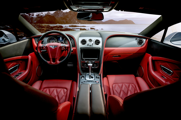

0.61731446: car-interior-005.jpg


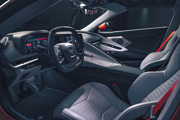

0.6142323: car-interior-004.jpg


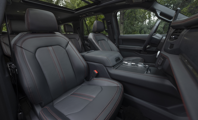

In [24]:
results = search_image("car with red leather front seats")
for result in results:  
    print(f"{result['@search.score']}: {result['file']}") 
    show_images(f"./img/{result['file']}")

### Search by image

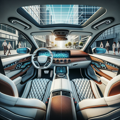

0.84963244: car-interior-002.jpg


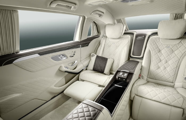

0.8426397: car-interior-003.jpg


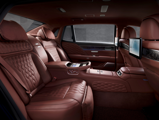

0.8242359: car-interior-000.jpg


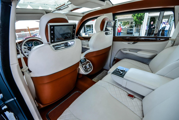

In [26]:
show_images("./dalle3-car-interior.jpg")

results = search_image_by_file("./dalle3-car-interior.jpg")
for result in results:  
    print(f"{result['@search.score']}: {result['file']}") 
    show_images(f"./img/{result['file']}")